In [72]:
import sys, os
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data_dir = os.path.join(os.getcwd(), "C1")
import pcse
cropfile = os.path.join(data_dir, 'WWH107.crop')
from pcse.fileinput import CABOFileReader
cropdata = CABOFileReader(cropfile)
cropdata["offset"] = 0.00212
cropdata["slope"]  = -0.0002
soilfile = os.path.join(data_dir, 'MO4.soil')
soildata = CABOFileReader(soilfile)
from pcse.util import WOFOST71SiteDataProvider
sitedata = WOFOST71SiteDataProvider(WAV=50, CO2=360)
from pcse.base import ParameterProvider
parameters = ParameterProvider(cropdata=cropdata, soildata=soildata, sitedata=sitedata)
from pcse.fileinput import YAMLAgroManagementReader
agromanagement_file = os.path.join(data_dir, 'WWH107_calendar.agro')
agromanagement = YAMLAgroManagementReader(agromanagement_file)
from pcse.fileinput import ExcelWeatherDataProvider
wdp = ExcelWeatherDataProvider('Fichier climatique_C1_2002-2003.xlsx')
from pcse.models import Wofost71_WLP_FD
wofsim = Wofost71_WLP_FD(parameters, wdp, agromanagement)
wofsim.run_till_terminate()
df_results1 = pd.DataFrame(wofsim.get_output())
df_results1 = df_results1.set_index("day")
df_results.tail()


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pcse/fileinput/yaml_agro_loader.py:21: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  r = yaml.load(fp)


,DVS,LAI,TAGP,TWSO,TWLV,TWST,TWRT,TRA,RD,SM,WWLOW
day,,,,,,,,,,,
2003-05-23,2.258932,0.0,6346.279158,2872.483642,1446.211189,2027.584327,773.641937,0.0,55.0,0.244894,27.869181
2003-05-24,2.308230,0.0,6346.279158,2872.483642,1446.211189,2027.584327,773.641937,0.0,55.0,0.243907,27.814904
2003-05-25,2.346740,0.0,6346.279158,2872.483642,1446.211189,2027.584327,773.641937,0.0,55.0,0.242944,27.761900
2003-05-26,2.378889,0.0,6346.279158,2872.483642,1446.211189,2027.584327,773.641937,0.0,55.0,0.241964,27.708022
2003-05-27,2.416049,0.0,6346.279158,2872.483642,1446.211189,2027.584327,773.641937,0.0,55.0,0.240964,27.653035


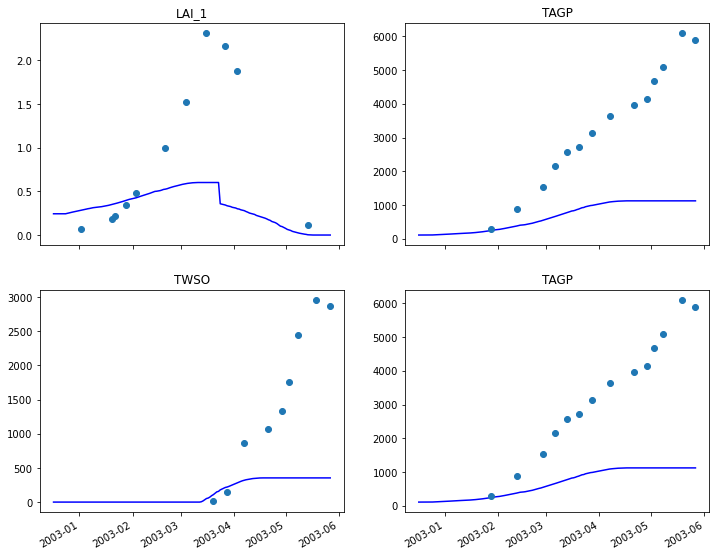

In [73]:
output = wofsim.get_output()
df = pd.DataFrame(output)
df.to_excel("wwh107_C1s.xls")
sortie_C1 = pd.read_excel('/Users/mac/LAI_2002_2003.xlsx') 
result = sortie_C1.set_index("day")
result.tail()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
for var, ax in zip(["LAI", "TAGP", "TWSO", "TAGP"], axes.flatten()):
    ax.plot_date(df_results1.index, df_results1[var], 'b-')
    ax.set_title(var)
for var, ax in zip(["LAI_1", "TAGP", "TWSO", "TAGP"], axes.flatten()):
    ax.plot_date(result.index, result[var])
    ax.set_title(var)
fig.autofmt_xdate()

In [52]:
dvs = np.arange(0,2.1,0.1)
offset = 0.00212
slope = -0.0002
sla = offset + slope*dvs
# print(f"{sla}\n")
slatb = np.array(list(zip(dvs, sla))).flatten()

In [53]:
list(zip(dvs, sla))

[(0.0, 0.00212),
 (0.1, 0.0021),
 (0.2, 0.00208),
 (0.30000000000000004, 0.0020599999999999998),
 (0.4, 0.0020399999999999997),
 (0.5, 0.00202),
 (0.6000000000000001, 0.002),
 (0.7000000000000001, 0.00198),
 (0.8, 0.00196),
 (0.9, 0.0019399999999999999),
 (1.0, 0.0019199999999999998),
 (1.1, 0.0018999999999999998),
 (1.2000000000000002, 0.00188),
 (1.3, 0.0018599999999999999),
 (1.4000000000000001, 0.0018399999999999998),
 (1.5, 0.00182),
 (1.6, 0.0018),
 (1.7000000000000002, 0.00178),
 (1.8, 0.0017599999999999998),
 (1.9000000000000001, 0.0017399999999999998),
 (2.0, 0.00172)]

In [25]:
cropdata['SLATB'] = slatb
params = ParameterProvider(cropdata=cropdata, sitedata=sitedata, soildata=soildata)
cropdata['SLATB']
# cropd['offset']

array([0.00e+00, 2.12e-03, 1.00e-01, 2.10e-03, 2.00e-01, 2.08e-03,
       3.00e-01, 2.06e-03, 4.00e-01, 2.04e-03, 5.00e-01, 2.02e-03,
       6.00e-01, 2.00e-03, 7.00e-01, 1.98e-03, 8.00e-01, 1.96e-03,
       9.00e-01, 1.94e-03, 1.00e+00, 1.92e-03, 1.10e+00, 1.90e-03,
       1.20e+00, 1.88e-03, 1.30e+00, 1.86e-03, 1.40e+00, 1.84e-03,
       1.50e+00, 1.82e-03, 1.60e+00, 1.80e-03, 1.70e+00, 1.78e-03,
       1.80e+00, 1.76e-03, 1.90e+00, 1.74e-03, 2.00e+00, 1.72e-03])

In [60]:
# sortie_SM = pd.read_excel('/Users/mac/Desktop/data/data_Lucas_R3_bl‚_2002_2003.xlsx') 
# result_SM = sortie_SM.set_index("day")
# result_SM

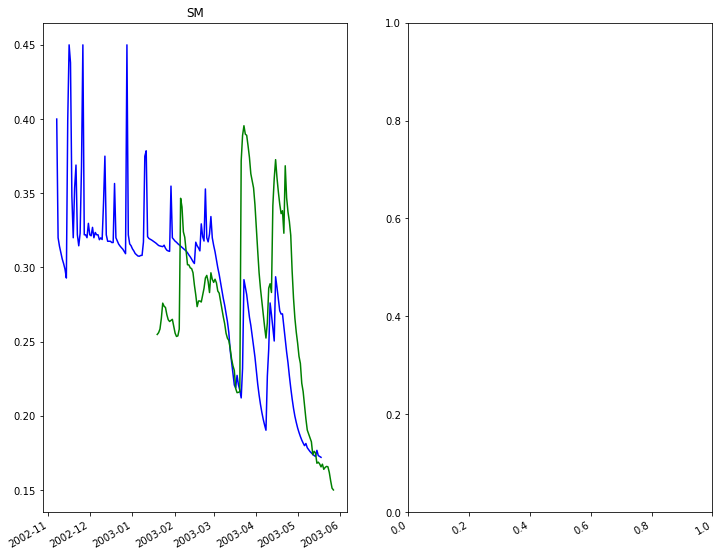

In [138]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,10))
for var, ax in zip(["SM"], axes.flatten()):
    ax.plot_date(df_results.index, df_results[var], 'b-')
    ax.set_title(var)
for var, ax in zip(["SM"], axes.flatten()):
    ax.plot_date(result_SM.index, result_SM[var], 'g-')
    ax.set_title(var)
fig.autofmt_xdate()

In [26]:
#OPTIMISATION : TDWI, SLATB
# class ModelRerunner(object):
#     """Reruns a given model with different values of parameters TWDI and SPAN.
    
#     Returns a pandas DataFrame with simulation results of the model with given
#     parameter values.
#     """
#     parameters = ["TDWI", "SPAN"]
    
#     def __init__(self, params, wdp, agro):
#         self.params = parameters
#         self.wdp = wdp
#         self.agro = agromanagement
        
#     def __call__(self, par_values):
#         # Check if correct number of parameter values were provided
#         if len(par_values) != len(self.parameters):
#             msg = "Optimizing %i parameters, but only % values were provided!" % (len(self.parameters, len(par_values)))
#             raise RuntimeError(msg)
#         # Clear any existing overrides
#         self.params.clear_override()
#         # Set overrides for the new parameter values
#         for parname, value in zip(self.parameters, par_values):
#             self.params.set_override(parname, value)
#         # Run the model with given parameter values
#         wofost = Wofost71_WLP_FD(self.params, self.wdp, self.agro)
#         wofost.run_till_terminate()
#         df = pd.DataFrame(wofost.get_output())
#         df.index = pd.to_datetime(df.day)
#         return df

class ModelRerunner(object):
    """Reruns a given model with different values of parameters TWDI and SPAN.
    
    Returns a pandas DataFrame with simulation results of the model with given
    parameter values.
    """
    # parameters = ["TDWI", "SPAN"]
    # parameters = ["SLATB"]
    parameters = ["offset", "slope"]
    # parameters = ["offset", "slope"]

    
    def __init__(self, params, wdp, agro):
        self.params = params
        self.wdp = wdp
        self.agro = agro
      
        
    def __call__(self, par_values):
        # Check if correct number of parameter values were provided
        if len(par_values) != len(self.parameters):
            msg = "Optimizing %i parameters, but only % values were provided!" % (len(self.parameters, len(par_values)))
            raise RuntimeError(msg)
        # Clear any existing overrides
        self.params.clear_override()
        # Set overrides for the new parameter values

        for parname, value in zip(self.parameters, par_values):
            self.params.set_override(parname, value)
        dvs = np.arange(0,2.1,0.1)
        offset = par_values[0]
        slope = par_values[1]
        sla = offset + slope*dvs
        # print(f"{sla}\n")
        slatb = np.array(list(zip(dvs, sla))).flatten()
        self.params.set_override('SLATB', slatb)
        # Run the model with given parameter values
        wofost = Wofost71_WLP_FD(self.params, self.wdp, self.agro)
        wofost.run_till_terminate()
        df = pd.DataFrame(wofost.get_output())
        df.index = pd.to_datetime(df.day)
        return df

In [27]:
# class ObjectiveFunctionCalculator(object):
#     """Computes the objective function.
    
#     This class runs the simulation model with given parameter values and returns the objective
#     function as the sum of squared difference between observed and simulated LAI.
# .   """
    
#     def __init__(self, params, wdp, agro, observations):
#         self.modelrerunner = ModelRerunner(parameters, wdp, agromanagement)
#         self.df_observations = observations
#         self.n_calls = 0
       
#     def __call__(self, par_values, grad=None):
#         """Runs the model and computes the objective function for given par_values.
        
#         The input parameter 'grad' must be defined in the function call, but is only
#         required for optimization methods where analytical gradients can be computed.
#         """
#         self.n_calls += 1
#         print(".", end="")
#         # Run the model and collect output
#         self.df_simulations = self.modelrerunner(par_values)
#         # compute the differences by subtracting the DataFrames
#         # Note that the dataframes automatically join on the index (dates) and column names
#         df_differences = self.df_simulations - self.df_observations
#         # Compute the RMSE on the LAI column
#         obj_func = np.sqrt(np.mean(df_differences.LAI**2))
#         return obj_func
    
class ObjectiveFunctionCalculator(object):
    """Computes the objective function.
    
    This class runs the simulation model with given parameter values and returns the objective
    function as the sum of squared difference between observed and simulated LAI.
.   """
    
    def __init__(self, params, wdp, agro, observations):
        self.modelrerunner = ModelRerunner(params, wdp, agro)
        self.df_observations = observations
        self.n_calls = 0
       
    def __call__(self, par_values, grad=None):
        """Runs the model and computes the objective function for given par_values.
        
        The input parameter 'grad' must be defined in the function call, but is only
        required for optimization methods where analytical gradients can be computed.
        """
        self.n_calls += 1
        print(".", end="")
        # Run the model and collect output
        self.df_simulations = self.modelrerunner(par_values)
        # compute the differences by subtracting the DataFrames
        # Note that the dataframes automatically join on the index (dates) and column names
        df_differences = self.df_simulations - self.df_observations
        # Compute the RMSE on the LAI column
        # obj_func = np.sqrt(np.mean(df_differences.TAGP**2))
        obj_func = np.sqrt(np.mean(df_differences.TAGP**2))
        return obj_func

In [28]:
TAGP_Observ = pd.read_excel('/Users/mac/LAI_2002_2003.xlsx', sheet_name="TAGP") 
ix = (TAGP_Observ.day == 0) & (df.TAGP.notnull())
df_pseudo_obs = df.loc[ix]
objfunc_calculator = ObjectiveFunctionCalculator(parameters, wdp, agromanagement, df_pseudo_obs)
defaults = [cropdata["offset"], cropdata["slope"] ]
error = objfunc_calculator(defaults)
print("Objective function value with default parameters (%s): %s" % (defaults, error))

.Objective function value with default parameters ([0.00212, -0.0002]): nan


In [15]:
# lowest_error = 99999
# best_values = None
# TDWI_range = [0.1, 0.6]
# SPAN_range = [15.0, 30.0]
# stepsize1 = 0.05
# stepsize2 = 1.
# ncalls = 0
# for p1 in np.arange(TDWI_range[0], TDWI_range[1], stepsize1):
#     for p2 in np.arange(SPAN_range[0], SPAN_range[1], stepsize2):
#         ncalls += 1
#         error = objfunc_calculator([p1, p2])
#         if error <  lowest_error:
#             best_values = [p1, p2]
#             lowest_error = error
# print("\noptimum at TDWI: %s, SPAN: %s" % (best_values[0], best_values[1]))
# print("minimum value = ",  lowest_error)
# print("With %i function calls" % ncalls)

In [40]:
# tbl_xy = [0.0, 0.0, 0.95, 0.0, 1.0, 1.0, 2.0, 1.0]
# x_list = tbl_xy[0::2]
# y_list = tbl_xy[1::2]
# import nlopt
# # Start optimizer with the SUBPLEX algorithm for two parameters
# opt = nlopt.opt(nlopt.LN_SBPLX, 2)
# optz = nlopt.opt(nlopt.G_MLSL, 2)
# # Assign the objective function calculator
# opt.set_min_objective(objfunc_calculator)
# # lower bounds of parameters values
# opt.set_lower_bounds([x_list[0], y_list[0]])
# # upper bounds of parameters values
# opt.set_upper_bounds([x_list[1], y_list[1]])
# # the initial step size to compute numerical gradients
# opt.set_initial_step([0.1, 0.05])
# # Maximum number of evaluations allowed
# opt.set_maxeval(300)
# # Relative tolerance for convergence
# opt.set_ftol_rel(0.1)

# # Start the optimization with the first guess
# firstguess = [0.0]
# optz.set_local_optimizer(opt)
# x = optz.optimize(opt.optimize(firstguess))
# print("\noptimum at x_list: %s, y_list: %s" % (x[0], x[1]))
# print("minimum value = ",  opt.last_optimum_value())
# print("result code = ", opt.last_optimize_result())
# print("With %i function calls" % objfunc_calculator.n_calls)

In [16]:
# # objfunc_calculator = ObjectiveFunctionCalculator(parameters, wdp, agromangement, df_pseudo_obs)
# # Start optimizer with the SUBPLEX algorithm for two parameters
# opt = nlopt.opt(nlopt.LN_SBPLX, 2)
# x_list = [1,2,3,4]
# y_list = [2,6,7,8]
# for i in range(len(x_list)):
#     # Assign the objective function calculator
#     opt.set_min_objective(objfunc_calculator)
#     # lower bounds of parameters values
#     opt.set_lower_bounds([x_list[i], y_list[i]])
#     # upper bounds of parameters values
#     opt.set_upper_bounds([10,10])
#     # the initial step size to compute numerical gradients
#     opt.set_initial_step([1, 2])
#     # Maximum number of evaluations allowed
#     opt.set_maxeval(200)
#     # Relative tolerance for convergence
#     opt.set_ftol_rel(0.1)
#     # Start the optimization with the first guess
#     firstguess = np.array([1, 2])
#     x = opt.optimize(firstguess)
#     print("\noptimum at TDWI: %s, SPAN: %s" % (x[0], x[1]))
#     print("minimum value = ",  opt.last_optimum_value())
#     print("result code = ", opt.last_optimize_result())
#     print("With %i function calls" % objfunc_calculator.n_calls)

In [31]:
objfunc_calculator = ObjectiveFunctionCalculator(params, wdp, agromanagement, df_pseudo_obs)
import nlopt
# Start optimizer with the SUBPLEX algorithm for two parameters
opt = nlopt.opt(nlopt.LN_SBPLX, 2)
# Assign the objective function calculator
opt.set_min_objective(objfunc_calculator)
# lower bounds of parameters values
# opt.set_lower_bounds([TDWI_range[0], SPAN_range[0]])
opt.set_lower_bounds([0.00150, -0.0003])
# upper bounds of parameters values
# opt.set_upper_bounds([TDWI_range[1], SPAN_range[1]])
opt.set_upper_bounds([0.00212, -0.0001])
# the initial step size to compute numerical gradients
# opt.set_initial_step([0.02, 2.])
opt.set_initial_step([0.0001, -0.0001])
# Maximum number of evaluations allowed
opt.set_maxeval(200)
# Relative tolerance for convergence
opt.set_ftol_rel(0.1)

# Start the optimization with the first guess
firstguess = [0.00150, -0.0003] # [0.2, 31.]
x = opt.optimize(firstguess)
print("\noptimum at TDWI: %s, SPAN: %s" % (x[0], x[1]))
print("minimum value = ",  opt.last_optimum_value())
print("result code = ", opt.last_optimize_result())
print("With %i function calls" % objfunc_calculator.n_calls)

........................................................................................................................................................................................................
optimum at TDWI: 0.0015, SPAN: -0.0003
minimum value =  nan
result code =  5
With 200 function calls


In [34]:
dvs = np.arange(0,2.1,0.1)
offset = 0.00150
slope = -0.0003
sla = offset + slope*dvs
# print(f"{sla}\n")
slatb = np.array(list(zip(dvs, sla)))
slatb

array([[0.00e+00, 1.50e-03],
       [1.00e-01, 1.47e-03],
       [2.00e-01, 1.44e-03],
       [3.00e-01, 1.41e-03],
       [4.00e-01, 1.38e-03],
       [5.00e-01, 1.35e-03],
       [6.00e-01, 1.32e-03],
       [7.00e-01, 1.29e-03],
       [8.00e-01, 1.26e-03],
       [9.00e-01, 1.23e-03],
       [1.00e+00, 1.20e-03],
       [1.10e+00, 1.17e-03],
       [1.20e+00, 1.14e-03],
       [1.30e+00, 1.11e-03],
       [1.40e+00, 1.08e-03],
       [1.50e+00, 1.05e-03],
       [1.60e+00, 1.02e-03],
       [1.70e+00, 9.90e-04],
       [1.80e+00, 9.60e-04],
       [1.90e+00, 9.30e-04],
       [2.00e+00, 9.00e-04]])

In [72]:
TDWI_range = [0.1, 0.6]
SPAN_range = [10.0, 30.0]
# Start optimizer with the SUBPLEX algorithm for two parameters
opt = nlopt.opt(nlopt.LN_SBPLX, 2)
# Assign the objective function calculator
opt.set_min_objective(objfunc_calculator)
# lower bounds of parameters values
opt.set_lower_bounds([TDWI_range[0], SPAN_range[0]])
# upper bounds of parameters values
opt.set_upper_bounds([TDWI_range[1], SPAN_range[1]])
# the initial step size to compute numerical gradients
opt.set_initial_step([0.02, 2.])
# Maximum number of evaluations allowed
opt.set_maxeval(200)
# Relative tolerance for convergence
opt.set_ftol_rel(0.1)

# Start the optimization with the first guess
firstguess = [0.2, 10.]
x = opt.optimize(firstguess)
print("\noptimum at TDWI: %s, SPAN: %s" % (x[0], x[1]))
print("minimum value = ",  opt.last_optimum_value())
print("result code = ", opt.last_optimize_result())
print("With %i function calls" % objfunc_calculator.n_calls)

........................................................................................................................................................................................................
optimum at TDWI: 0.2, SPAN: 10.0
minimum value =  nan
result code =  5
With 201 function calls


.

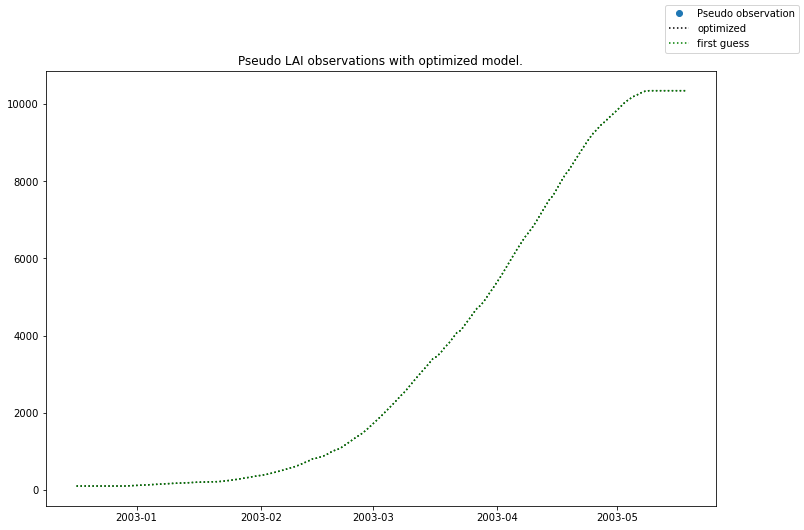

In [32]:
fig, axes = plt.subplots(figsize=(12,8))
axes.plot_date(df_pseudo_obs.index, df_pseudo_obs.TAGP, label="Pseudo observation")
axes.plot_date(objfunc_calculator.df_simulations.index, objfunc_calculator.df_simulations.TAGP, "k:", label="optimized")
# rerun to show the first guess for the first guess
error = objfunc_calculator(firstguess)
axes.plot_date(objfunc_calculator.df_simulations.index, objfunc_calculator.df_simulations.TAGP, "g:", label="first guess")
axes.set_title("Pseudo LAI observations with optimized model.")
fig.legend()

In [18]:
tbl_xy = [0.0, 0.0, 0.95, 0.0, 1.0, 1.0, 2.0, 1.0]
x_list = tbl_xy[0::2]
y_list = tbl_xy[1::2]
x_list

[0.0, 0.95, 1.0, 2.0]

In [37]:
y_list

[0.0, 0.0, 1.0, 1.0]

In [48]:
import sys, os
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data_dir = os.path.join(os.getcwd(), "C1")
import pcse
cropfile = os.path.join(data_dir, 'Fichier culture C1.crop')
from pcse.fileinput import CABOFileReader
cropdata = CABOFileReader(cropfile)
soilfile = os.path.join(data_dir, 'MO4.soil')
soildata = CABOFileReader(soilfile)
from pcse.util import WOFOST71SiteDataProvider
sitedata = WOFOST71SiteDataProvider(WAV=0.245, CO2=360)
from pcse.base import ParameterProvider
parameters = ParameterProvider(cropdata=cropdata, soildata=soildata, sitedata=sitedata)
from pcse.fileinput import YAMLAgroManagementReader
agromanagement_file = os.path.join(data_dir, 'Agromanagement_C1.agro')
agromanagement = YAMLAgroManagementReader(agromanagement_file)
from pcse.fileinput import ExcelWeatherDataProvider
wdp = ExcelWeatherDataProvider('Fichier climatique_C1_2002-2003.xlsx')
from pcse.models import Wofost71_WLP_FD
wofsim = Wofost71_WLP_FD(parameters, wdp, agromanagement)
wofsim.run_till_terminate()
df_results = pd.DataFrame(wofsim.get_output())
df_results = df_results.set_index("day")
df_results.tail()


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pcse/fileinput/yaml_agro_loader.py:21: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  r = yaml.load(fp)


,DVS,LAI,TAGP,TWSO,TWLV,TWST,TWRT,TRA,RD,SM,WWLOW,EVW,EVS
day,,,,,,,,,,,,,
2003-05-23,2.0,0.0,6334.747421,2889.686207,1728.428574,1716.632639,665.364189,0.0,55.0,0.247769,13.627314,0.0,0.058290
2003-05-24,2.0,0.0,6334.747421,2889.686207,1728.428574,1716.632639,665.364189,0.0,55.0,0.246710,13.569024,0.0,0.051582
2003-05-25,2.0,0.0,6334.747421,2889.686207,1728.428574,1716.632639,665.364189,0.0,55.0,0.245772,13.517442,0.0,0.049521
2003-05-26,2.0,0.0,6334.747421,2889.686207,1728.428574,1716.632639,665.364189,0.0,55.0,0.244871,13.467921,0.0,0.054234
2003-05-27,2.0,0.0,6334.747421,2889.686207,1728.428574,1716.632639,665.364189,0.0,55.0,0.243885,13.413687,0.0,0.053236


In [49]:
wofsim.get_summary_output()

[{'DVS': 2.0,
  'LAIMAX': 2.3304236187108365,
  'TAGP': 6334.74742085877,
  'TWSO': 2889.6862072632393,
  'TWLV': 1728.428574123487,
  'TWST': 1716.6326394720443,
  'TWRT': 665.3641885309178,
  'CTRAT': 14.927329081043037,
  'RD': 55.0,
  'DOS': datetime.date(2002, 12, 17),
  'DOE': datetime.date(2002, 12, 29),
  'DOA': datetime.date(2003, 3, 31),
  'DOM': datetime.date(2003, 5, 18),
  'DOH': datetime.date(2003, 5, 27),
  'DOV': None}]

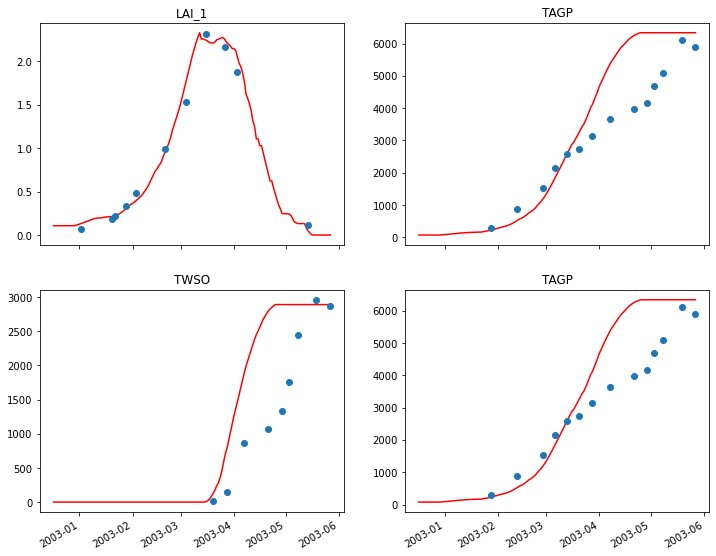

In [50]:
output = wofsim.get_output()
df = pd.DataFrame(output)
df.to_excel("wwh107_C1s.xls")
sortie_C1 = pd.read_excel('/Users/mac/LAI_2002_2003.xlsx') 
result = sortie_C1.set_index("day")
result.tail()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
for var, ax in zip(["LAI", "TAGP", "TWSO", "TAGP"], axes.flatten()):
    ax.plot_date(df_results.index, df_results[var], 'r-')
    ax.set_title(var)
for var, ax in zip(["LAI_1", "TAGP", "TWSO", "TAGP"], axes.flatten()):
    ax.plot_date(result.index, result[var])
    ax.set_title(var)
fig.autofmt_xdate()

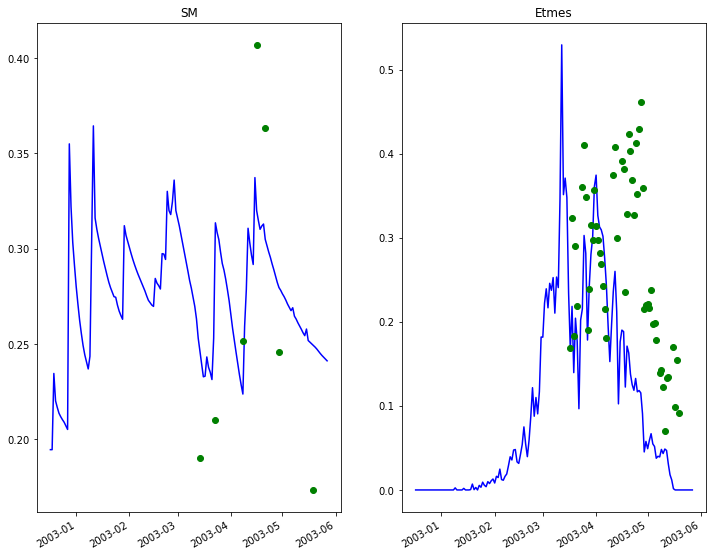

In [18]:
sortie_SM = pd.read_excel('/Users/mac/Desktop/data/data_Lucas_R3_bl‚_2002:2003.xlsx', sheet_name="F2-2002-2003_C1") 
result_SM = sortie_SM.set_index("day")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,10))
for var, ax in zip(["SM", "TRA"], axes.flatten()):
    ax.plot_date(df_results.index, df_results[var], 'b-')
    ax.set_title(var)
for var, ax in zip(["SM", "Etmes"], axes.flatten()):
    ax.plot_date(result_SM.index, result_SM[var], 'go')
    ax.set_title(var)
fig.autofmt_xdate()

In [74]:
sortie_SM = pd.read_excel('/Users/mac/Desktop/data/data_Lucas_R3_bl‚_2002:2003.xlsx', sheet_name="F2-2002-2003_C1") 
sortie_SM

,day,Etmes,SM_5_Mes,SM_10_Mes,SM_20_Mes,SM_30_Mes,SM_50_Mes,P+I,ET0(mm),SM,SM1,ET estimee,SMcorr,R^2,ET(MAX_MIN),SM(MAX_MIN)
0,2002-12-17,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.986149,NaN,NaN,NaN,NaN,0.41194,0.461308,40.697844
1,2002-12-18,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.916199,NaN,NaN,NaN,NaN,NaN,0.069918,17.335614
2,2002-12-19,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.977358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002-12-20,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.306068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002-12-21,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.325424,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.074031,NaN,NaN,NaN,NaN
158,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.064722,NaN,NaN,NaN,NaN
159,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062360,NaN,NaN,NaN,NaN
160,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062266,NaN,NaN,NaN,NaN


In [76]:
sortie_SM.at[40,"SM"]

nan

In [21]:
#OPTIMISATION : TDWI, SLATB
class ModelRerunner(object):
    """Reruns a given model with different values of parameters TWDI and SPAN.
    
    Returns a pandas DataFrame with simulation results of the model with given
    parameter values.
    """
    parameters = ["CFET", "DEPNR"]
    
    def __init__(self, params, wdp, agro):
        self.params = parameters
        self.wdp = wdp
        self.agro = agromanagement
        
    def __call__(self, par_values):
        # Check if correct number of parameter values were provided
        if len(par_values) != len(self.parameters):
            msg = "Optimizing %i parameters, but only % values were provided!" % (len(self.parameters, len(par_values)))
            raise RuntimeError(msg)
        # Clear any existing overrides
        self.params.clear_override()
        # Set overrides for the new parameter values
        for parname, value in zip(self.parameters, par_values):
            self.params.set_override(parname, value)
        # Run the model with given parameter values
        wofost = Wofost71_WLP_FD(self.params, self.wdp, self.agro)
        wofost.run_till_terminate()
        df = pd.DataFrame(wofost.get_output())
        df.index = pd.to_datetime(df.day)
        return df
    
class ObjectiveFunctionCalculator(object):
    """Computes the objective function.
    
    This class runs the simulation model with given parameter values and returns the objective
    function as the sum of squared difference between observed and simulated LAI.
.   """
    
    def __init__(self, params, wdp, agro, observations):
        self.modelrerunner = ModelRerunner(parameters, wdp, agromanagement)
        self.df_observations = observations
        self.n_calls = 0
       
    def __call__(self, par_values, grad=None):
        """Runs the model and computes the objective function for given par_values.
        
        The input parameter 'grad' must be defined in the function call, but is only
        required for optimization methods where analytical gradients can be computed.
        """
        self.n_calls += 1
        print(".", end="")
        # Run the model and collect output
        self.df_simulations = self.modelrerunner(par_values)
        # compute the differences by subtracting the DataFrames
        # Note that the dataframes automatically join on the index (dates) and column names
        df_differences = self.df_simulations - self.df_observations
        # Compute the RMSE on the LAI column
        obj_func = np.sqrt(np.mean(df_differences.SM**2))
        return obj_func

In [12]:
SM_Observ = pd.read_excel('/Users/mac/Desktop/data/data_Lucas_R3_bl‚_2002_2003.xlsx', sheet_name="F1-2002-2003") 
ix = (SM_Observ.day == 0) & (df.SM.notnull())
df_pseudo_obs = df.loc[ix]
objfunc_calculator = ObjectiveFunctionCalculator(parameters, wdp, agromanagement, df_pseudo_obs)
defaults = [cropdata["CFET"], cropdata["DEPNR"]]
error = objfunc_calculator(defaults)
print("Objective function value with default parameters (%s): %s" % (defaults, error))

.Objective function value with default parameters ([1.15, 4.0]): nan


In [14]:
CFET_range = [0.5, 2]
DEPNR_range = [1, 5]
# RGRLAI_range = [0.00500, 0.600]
import nlopt
# Start optimizer with the SUBPLEX algorithm for two parameters
opt = nlopt.opt(nlopt.LN_SBPLX, 2)
# Assign the objective function calculator
opt.set_min_objective(objfunc_calculator)
# lower bounds of parameters values
opt.set_lower_bounds([CFET_range[0], DEPNR_range[0]])
# upper bounds of parameters values
opt.set_upper_bounds([CFET_range[1], DEPNR_range[1]])
# the initial step size to compute numerical gradients
opt.set_initial_step([0.1, 0.2])
# Maximum number of evaluations allowed
opt.set_maxeval(500)
# Relative tolerance for convergence
opt.set_ftol_rel(0.1)

# Start the optimization with the first guess
firstguess = [0.5, 1]
x = opt.optimize(firstguess)
print("\noptimum at CFET: %s, DEPNR: %s" % (x[0], x[1]))
print("minimum value = ",  opt.last_optimum_value())
print("result code = ", opt.last_optimize_result())
print("With %i function calls" % objfunc_calculator.n_calls)

.......................................................................................................................................................................................................................................
optimum at CFET: 0.5, DEPNR: 1.0
minimum value =  nan
result code =  4
With 432 function calls
